#Importing and installing necessary libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv
import os
import zipfile
import plotly.graph_objects as go
from rdkit import Chem
from rdkit.Chem import Draw
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


!pip install rdkit-pypi


##Reading the csv provided by the mentor, and making predictions on it.

```
#following commands were used
ersilia serve eos30gr
ersilia -v api run -i reference_library.csv -o reference_library_output.json
```

###Since I was getting error with getting output as csv, I decided to go with json and then read json to convert to csv for further inferences.

##Reading json and converting to csv: **ref_lib_output.csv**

In [ ]:
df1 = pd.read_csv("/content/reference_library.csv")
df1.head()

,smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...


In [ ]:
df1.shape

(1000, 1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
# Load JSON data
with open('/content/reference_library_output.json', 'r') as f:
    data = json.load(f)

# Define CSV filename
csv_filename = 'ref_lib_output.csv'

# Write data to CSV
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ['key', 'input', 'outcome']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for entry in data:
        writer.writerow({
            'key': entry['input']['key'],
            'input': entry['input']['input'],
            'outcome': entry['output']['outcome']
        })

print(f"CSV file '{csv_filename}' has been created successfully.")


CSV file 'ref_lib_output.csv' has been created successfully.


##Reading the **ref_lib_output.csv**

In [ ]:
ref_lib_output = pd.read_csv("/content/ref_lib_output.csv")
ref_lib_output

,key,input,outcome
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,0.347112
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,0.547030
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,0.178218
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,0.620462
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,0.623267
...,...,...,...
995,RGKVPYQYBUAAEH-UHFFFAOYSA-N,CCCN1C(C2=CN=C(NC3=CC=C(C)N=C3)C(Cl)=C2)=NC2=C...,0.759488
996,VTRFEMUYHTXFEQ-UHFFFAOYSA-N,CN(CC1=CC=CC2=CC=CC=C12)CN1N=C(C2=CC=NC=C2)OC1=O,0.778878
997,QDFOYTHIYBSDPW-RGAOVNQFSA-N,O=C(N[C@@H](CSCC1=CC=CC=C1)C(=O)NC1=CC=C(C2S/C...,0.532178
998,YZQZXLROYFNFQE-QTGUNEKASA-N,CN1CC[C@]23CCCC[C@H]2[C@H]1CC1=CC=C(OC2=CC=CC=...,0.881188


##Downloading **ref_lib_output.csv**

In [ ]:
from google.colab import files
files.download("/content/ref_lib_output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import plotly.graph_objects as go

# Sort the output dataframe by probability in descending order and select the top 10
top_10_highest = ref_lib_output.sort_values(by='outcome', ascending=False).head(10)

# Create text for hover information
hover_text = ['<br>'.join([f"<b>{col}:</b> {row[col]}" for col in top_10_highest.columns]) for index, row in top_10_highest.iterrows()]

# Create the scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=top_10_highest['key'], y=top_10_highest['outcome'], mode='markers',
                                 marker=dict(color='blue', opacity=0.5),
                                 text=hover_text,
                                 hoverinfo='text'))

# Add titles and labels
fig.update_layout(title='Top 10 Molecules with Highest Probability Outcomes of hERG Blockers',
                  xaxis_title='Molecule Keys',
                  yaxis_title='Probability')

# Show the plot
fig.show()


In [82]:
top_10_highest

,key,input,outcome
626,RBFHCAHIEQNMRT-UHFFFAOYSA-N,O=C1NC2=CC=CC=C2N1CCCCN1CCN(C2=CC=CC=C2)CC1,0.967822
488,SKAYGFFLRFARDX-OZIXAUCHSA-N,O=C(OC[C@]1(C2=CC=CC=C2)CC[C@H](N2CCC(C3=CC=C(...,0.955446
801,YWUIURMXEQXMRN-UHFFFAOYSA-N,CN(C)CCCN1C2=CC=CC=C2CCC2=CC=C(CCCOCC3=CC=CC4=...,0.952805
894,DREYZGCIOLBBDK-UHFFFAOYSA-N,CC1=C(C2=CC=C(OCCCN3CCCC3)C=C2)OC2=CC=CC=C2S1,0.935644
940,BVHSBJDVWQILPE-UHFFFAOYSA-N,C1=CC=C2C(=C1)C1=C(N2CCCN2CCCCC2)CN(CCCC2=CC=N...,0.933168
44,PNKWWEGPNJVDEY-UHFFFAOYSA-N,Cl.Cl.N#CC1=CC=C(CN2C(CN3CCCC3)=NC3=CC=CC=C23)...,0.927723
979,FKVJZEWHJURNAD-BHDDXSALSA-N,CCCCOC1=CC=C([C@@H]2C3=CC=CC=C3[C@H]3NCCC[C@@H...,0.923267
406,SJGMTSWAPUKQDL-UHFFFAOYSA-N,COC1=CC=C2N=C3C=C(Cl)C=CC3=C(NCCCN(CCCNC3=C4C(...,0.922442
697,JESULJQFGFJISO-UHFFFAOYSA-N,CC1SC(C)(C)C(=O)N1CCCCN1CCN(C2=CN(C3=CC=CC=C3)...,0.920792
121,GUSYYOQMHQNUSZ-UHFFFAOYSA-N,ClC1=CC=C(N=C2C=CN(CCCCCN3C=CC(=NC4=CC=C(Cl)C=...,0.915842


In [83]:
import plotly.graph_objects as go

# Sort the output dataframe by probability in descending order and select the top 10
top_10_lowest = ref_lib_output.sort_values(by='outcome', ascending=True).head(10)

hover_text = ['<br>'.join([f"<b>{col}:</b> {row[col]}" for col in top_10_lowest.columns]) for index, row in top_10_lowest.iterrows()]


# Create the scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=top_10_lowest['key'], y=top_10_lowest['outcome'], mode='markers',
                                 marker=dict(color='blue', opacity=0.5),
                                 text=hover_text,
                                 hoverinfo='text'))

# Add titles and labels
fig.update_layout(title='Top 10 Molecules with Lowest Probability Outcomes of hERG Blockers',
                  xaxis_title='Molecule Keys',
                  yaxis_title='Probability')

# Hide x-axis ticks and labels for better visualization
# fig.update_xaxes(showticklabels=False)

# Show the plot
fig.show()

In [84]:
top_10_lowest

,key,input,outcome
522,BFEFHAHFFFXJIT-FOKLQQMPSA-N,CCO/N=C1\CC(N)CN(C2=NC3=C(C=C2F)C(=O)C(C(=O)O)...,0.034653
264,BQVZICWQBFTOJX-QNDZYWSYSA-N,C[C@@H]1C[C@@](N)(C(=O)O)[C@@H]2[C@@H](C(=O)O)...,0.037459
321,FKEZNZQUWVVTHQ-UHFFFAOYSA-N,CNC1CN(C2=NC(N)=NC3=CC(C#N)=CN=C23)C1,0.037954
519,PTOCNKSXDLHDSI-UHFFFAOYSA-N,CN(N=O)C1=CC=CC=C1O,0.056106
160,AJINREBJQTYYQG-UHFFFAOYSA-N,CCCC(=O)N1CCN(C2=CC3=C(C=C2F)C(=O)C(C(=O)O)=CN...,0.064356
5,CSYFJLPYVQTDCQ-MRXNPFEDSA-N,CN1C(=O)C2=C(N=C(N3CCC[C@@H](N)C3)N2CC2=CC(F)=...,0.065182
137,XVXCKHQWKUVAPE-UHFFFAOYSA-N,CC(NC(=O)C1=CC=C(S(N)(=O)=O)C=C1)C(=O)O,0.069307
570,JCZPOYAMKJFOLA-IMJSIDKUSA-N,O[C@H]1CNC[C@@H]1O,0.074587
45,NQOFDAVXLYCOSS-UWVGGRQHSA-N,CC(=O)N[C@@H](CCN)C(=O)N[C@@H](CC(C)C)C(N)=O,0.082921
39,WOOTYTHCLUCBAN-BQQVRQSRSA-N,CS(=O)(=O)O.C[C@H]1CN(C2=C(F)C=C3C(=O)C(C(=O)O...,0.085644


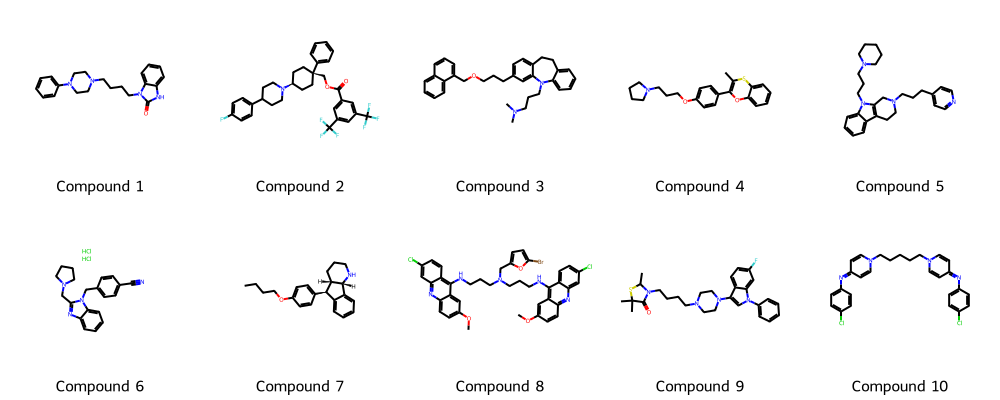

In [85]:
# List of SMILES strings of the molecules
smiles_list = top_10_highest['input']

# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Draw the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=5,returnPNG=False, subImgSize=(200, 200), legends=[f"Compound {i+1}" for i in range(len(mols))])
# Save the image to a file
img_path = "molecules.png"
img.save(img_path)

# Display the saved image
from IPython.display import Image
Image(img_path)


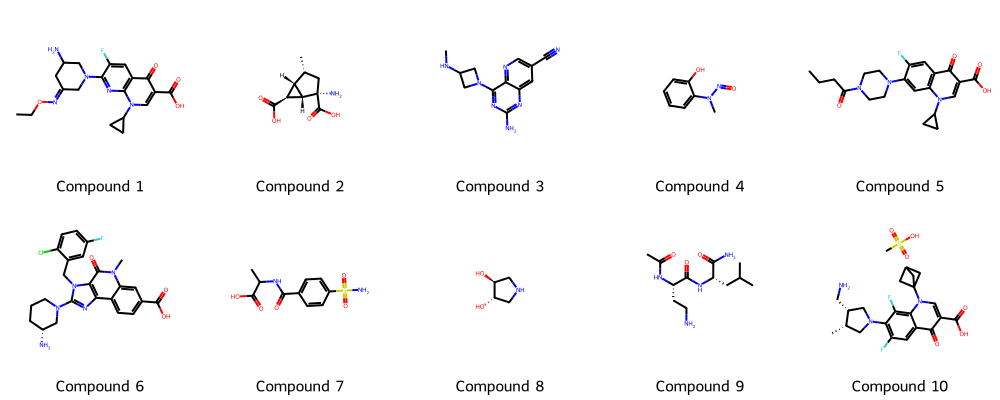

In [86]:
from rdkit import Chem
from rdkit.Chem import Draw

# List of SMILES strings of the molecules
smiles_list = top_10_lowest['input']

# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Draw the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=5,returnPNG=False, subImgSize=(200, 200), legends=[f"Compound {i+1}" for i in range(len(mols))])
# Save the image to a file
img_path = "molecules.png"
img.save(img_path)

# Display the saved image
from IPython.display import Image
Image(img_path)

In [87]:
from rdkit import Chem

def calculate_molecular_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("Invalid SMILES")
        return None

    properties = {}

    # Number of carbon atoms
    properties['NumCarbonAtoms'] = mol.GetNumAtoms(6)  # Atomic number 6 corresponds to carbon

    # Number of halogens (F, Cl, Br, I)
    halogens = [9, 17, 35, 53]  # Atomic numbers of halogens
    properties['NumHalogens'] = sum([mol.GetNumAtoms(halogen) for halogen in halogens])

    # Number of pi bonds
    properties['NumPiBonds'] = Chem.rdMolDescriptors.CalcNumAromaticRings(mol)

    # Number of aromatic rings
    properties['NumAromaticRings'] = Chem.rdMolDescriptors.CalcNumAromaticRings(mol)

    # Aromaticity (binary)
    properties['Aromaticity'] = Chem.rdMolDescriptors.CalcNumAromaticRings(mol) > 0

    # Number of rings
    properties['NumRings'] = mol.GetRingInfo().NumRings()

    # Number of hydrogen bond donors
    properties['NumHBD'] = Chem.rdMolDescriptors.CalcNumHBD(mol)

    # Molecular weight
    properties['MolecularWeight'] = Chem.rdMolDescriptors.CalcExactMolWt(mol)

    # Planarity
    # properties['Planar'] = not mol.HasSubstructMatch(Chem.rdchem.MolFromSmarts("[!R]@[R](@*)(@*)@[!R]"))

    return properties

# Example SMILES strings
smiles_list = top_10_highest['input']

# Calculate properties for each molecule
for smiles in smiles_list:
    properties = calculate_molecular_properties(smiles)
    if properties:
        print(f"Molecule: {smiles}")
        print(f"Number of Carbon Atoms: {properties['NumCarbonAtoms']}")
        print(f"Number of Halogens: {properties['NumHalogens']}")
        print(f"Number of Pi Bonds: {properties['NumPiBonds']}")
        print(f"Number of Aromatic Rings: {properties['NumAromaticRings']}")
        print(f"Aromaticity: {'Yes' if properties['Aromaticity'] else 'No'}")
        # print(f"Planar: {'Yes' if properties['Planar'] else 'No'}")
        print(f"Number of Rings: {properties['NumRings']}")
        print(f"Number of Hydrogen Bond Donors: {properties['NumHBD']}")
        print(f"Molecular Weight: {properties['MolecularWeight']}")
        print()

Molecule: O=C1NC2=CC=CC=C2N1CCCCN1CCN(C2=CC=CC=C2)CC1
Number of Carbon Atoms: 26
Number of Halogens: 104
Number of Pi Bonds: 3
Number of Aromatic Rings: 3
Aromaticity: Yes
Number of Rings: 4
Number of Hydrogen Bond Donors: 1
Molecular Weight: 350.210661452

Molecule: O=C(OC[C@]1(C2=CC=CC=C2)CC[C@H](N2CCC(C3=CC=C(F)C=C3)CC2)CC1)C1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1
Number of Carbon Atoms: 43
Number of Halogens: 172
Number of Pi Bonds: 3
Number of Aromatic Rings: 3
Aromaticity: Yes
Number of Rings: 5
Number of Hydrogen Bond Donors: 0
Molecular Weight: 607.232126804

Molecule: CN(C)CCCN1C2=CC=CC=C2CCC2=CC=C(CCCOCC3=CC=CC4=CC=CC=C34)C=C12
Number of Carbon Atoms: 36
Number of Halogens: 144
Number of Pi Bonds: 4
Number of Aromatic Rings: 4
Aromaticity: Yes
Number of Rings: 5
Number of Hydrogen Bond Donors: 0
Molecular Weight: 478.29841383599995

Molecule: CC1=C(C2=CC=C(OCCCN3CCCC3)C=C2)OC2=CC=CC=C2S1
Number of Carbon Atoms: 26
Number of Halogens: 104
Number of Pi Bonds: 2
Number of Aromatic Rings:

[21:35:08] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:08] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:08] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:08] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:08] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:08] WARNING: the onlyHeavy argument to mol.

In [88]:
import plotly.graph_objects as go

# Calculate properties for each molecule in smiles_list
properties_list = [calculate_molecular_properties(smiles) for smiles in smiles_list if calculate_molecular_properties(smiles)]

# Extract properties from the list
num_carbon_atoms = [properties['NumCarbonAtoms'] for properties in properties_list]
num_halogens = [properties['NumHalogens'] for properties in properties_list]
num_pi_bonds = [properties['NumPiBonds'] for properties in properties_list]
num_aromatic_rings = [properties['NumAromaticRings'] for properties in properties_list]
num_rings = [properties['NumRings'] for properties in properties_list]
num_hbd = [properties['NumHBD'] for properties in properties_list]
molecular_weights = [properties['MolecularWeight'] for properties in properties_list]

# Create separate plots for each property
plots = []
properties_description = ['NumCarbonAtoms','NumHalogens','NumPiBonds','NumAromaticRings','NumRings','NumHBD','MolecularWeight']
# Number of Carbon Atoms
plot1 = go.Bar(x=list(range(len(properties_list))), y=num_carbon_atoms, name='Number of Carbon Atoms')
plots.append(plot1)

# Number of Halogens
plot2 = go.Bar(x=list(range(len(properties_list))), y=num_halogens, name='Number of Halogens')
plots.append(plot2)

# Number of Pi Bonds
plot3 = go.Bar(x=list(range(len(properties_list))), y=num_pi_bonds, name='Number of Pi Bonds')
plots.append(plot3)

# Number of Aromatic Rings
plot4 = go.Bar(x=list(range(len(properties_list))), y=num_aromatic_rings, name='Number of Aromatic Rings')
plots.append(plot4)

# Number of Rings
plot5 = go.Bar(x=list(range(len(properties_list))), y=num_rings, name='Number of Rings')
plots.append(plot5)

# Number of H-Bond Donors
plot6 = go.Bar(x=list(range(len(properties_list))), y=num_hbd, name='Number of H-Bond Donors')
plots.append(plot6)

# Molecular Weight
plot7 = go.Bar(x=list(range(len(properties_list))), y=molecular_weights, name='Molecular Weight')
plots.append(plot7)

# Create and display separate plots for each property
for i, plot in enumerate(plots, start=0):
    fig = go.Figure(data=[plot])
    fig.update_layout(title=f'Molecular Property : {properties_description[i]}', xaxis_title='Molecule Index', yaxis_title='Property Value')
    fig.show()


[21:35:09] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:09] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:09] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:09] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:09] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:09] WARNING: the onlyHeavy argument to mol.

In [89]:
# Example SMILES strings
smiles_list = top_10_lowest['input']

# Calculate properties for each molecule
for smiles in smiles_list:
    properties = calculate_molecular_properties(smiles)
    if properties:
        print(f"Molecule: {smiles}")
        print(f"Number of Carbon Atoms: {properties['NumCarbonAtoms']}")
        print(f"Number of Halogens: {properties['NumHalogens']}")
        print(f"Number of Pi Bonds: {properties['NumPiBonds']}")
        print(f"Number of Aromatic Rings: {properties['NumAromaticRings']}")
        print(f"Aromaticity: {'Yes' if properties['Aromaticity'] else 'No'}")
        # print(f"Planar: {'Yes' if properties['Planar'] else 'No'}")
        print(f"Number of Rings: {properties['NumRings']}")
        print(f"Number of Hydrogen Bond Donors: {properties['NumHBD']}")
        print(f"Molecular Weight: {properties['MolecularWeight']}")
        print()

Molecule: CCO/N=C1\CC(N)CN(C2=NC3=C(C=C2F)C(=O)C(C(=O)O)=CN3C2CC2)C1
Number of Carbon Atoms: 29
Number of Halogens: 116
Number of Pi Bonds: 2
Number of Aromatic Rings: 2
Aromaticity: Yes
Number of Rings: 4
Number of Hydrogen Bond Donors: 2
Molecular Weight: 403.16558240399996

Molecule: C[C@@H]1C[C@@](N)(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@H]12
Number of Carbon Atoms: 14
Number of Halogens: 56
Number of Pi Bonds: 0
Number of Aromatic Rings: 0
Aromaticity: No
Number of Rings: 2
Number of Hydrogen Bond Donors: 3
Molecular Weight: 199.084457896

Molecule: CNC1CN(C2=NC(N)=NC3=CC(C#N)=CN=C23)C1
Number of Carbon Atoms: 19
Number of Halogens: 76
Number of Pi Bonds: 2
Number of Aromatic Rings: 2
Aromaticity: Yes
Number of Rings: 3
Number of Hydrogen Bond Donors: 2
Molecular Weight: 255.12324341599998

Molecule: CN(N=O)C1=CC=CC=C1O
Number of Carbon Atoms: 11
Number of Halogens: 44
Number of Pi Bonds: 1
Number of Aromatic Rings: 1
Aromaticity: Yes
Number of Rings: 1
Number of Hydrogen Bond Donors: 1


[21:35:15] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:15] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:15] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:15] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:15] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:15] WARNING: the onlyHeavy argument to mol.

In [90]:
import plotly.graph_objects as go

# Calculate properties for each molecule in smiles_list
properties_list = [calculate_molecular_properties(smiles) for smiles in smiles_list if calculate_molecular_properties(smiles)]

# Extract properties from the list
num_carbon_atoms = [properties['NumCarbonAtoms'] for properties in properties_list]
num_halogens = [properties['NumHalogens'] for properties in properties_list]
num_pi_bonds = [properties['NumPiBonds'] for properties in properties_list]
num_aromatic_rings = [properties['NumAromaticRings'] for properties in properties_list]
num_rings = [properties['NumRings'] for properties in properties_list]
num_hbd = [properties['NumHBD'] for properties in properties_list]
molecular_weights = [properties['MolecularWeight'] for properties in properties_list]

# Create separate plots for each property
plots = []
properties_description = ['NumCarbonAtoms','NumHalogens','NumPiBonds','NumAromaticRings','NumRings','NumHBD','MolecularWeight']
# Number of Carbon Atoms
plot1 = go.Bar(x=list(range(len(properties_list))), y=num_carbon_atoms, name='Number of Carbon Atoms')
plots.append(plot1)

# Number of Halogens
plot2 = go.Bar(x=list(range(len(properties_list))), y=num_halogens, name='Number of Halogens')
plots.append(plot2)

# Number of Pi Bonds
plot3 = go.Bar(x=list(range(len(properties_list))), y=num_pi_bonds, name='Number of Pi Bonds')
plots.append(plot3)

# Number of Aromatic Rings
plot4 = go.Bar(x=list(range(len(properties_list))), y=num_aromatic_rings, name='Number of Aromatic Rings')
plots.append(plot4)

# Number of Rings
plot5 = go.Bar(x=list(range(len(properties_list))), y=num_rings, name='Number of Rings')
plots.append(plot5)

# Number of H-Bond Donors
plot6 = go.Bar(x=list(range(len(properties_list))), y=num_hbd, name='Number of H-Bond Donors')
plots.append(plot6)

# Molecular Weight
plot7 = go.Bar(x=list(range(len(properties_list))), y=molecular_weights, name='Molecular Weight')
plots.append(plot7)

# Create and display separate plots for each property
for i, plot in enumerate(plots, start=0):
    fig = go.Figure(data=[plot])
    fig.update_layout(title=f'Molecular Property : {properties_description[i]}', xaxis_title='Molecule Index', yaxis_title='Property Value')
    fig.show()


[21:35:34] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:34] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:34] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:34] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:34] WARNING: the onlyHeavy argument to mol.GetNumAtoms() has been deprecated. Please use the onlyExplicit argument instead or mol.GetNumHeavyAtoms() if you want the heavy atom count.
[21:35:34] WARNING: the onlyHeavy argument to mol.

##Inferences:


1.   If the molecule if aromatic, its more likely that it has high probabilty to be a hERG blocker. This is because all the molecules in top_10_highest has aromaticity as YES
2.   If the number of aromatic rings is high, high is the probabilty to be a hERG blocker. Each molecule in top_10_highest has has aromatic rings >=4 while in top_10_lowest mostly molecules had aromatic rings <=2.

More properties like that of solubility, diffusion, absorbtion also affect the probabilty.(I am planning to deep dive into them too)



#Reading the csv I had gathered from ChEMBL DB


1.   **Downloading the data**
    
      I found this link : https://jhylin.github.io/Data_in_life_blog/posts/08_ML1_Small_molecules_in_ChEMBL_database/ML1_chembl_cpds.html

      It helped me to get the url of the zip file conatining molecules data.
      
2.   Using wget to download the zip file.
3.   Extract the ZIP file.
4.   Read the CSV file using pandas.




In [ ]:
# URL of the ZIP file
zip_url = "https://www.ebi.ac.uk/chembl/interface_api/delayed_jobs/outputs/DOWNLOAD-bGxOa7WMXUE0NN6ZKzAhPRjpjNgO-KtkZjIlyPHO01c=/DOWNLOAD-bGxOa7WMXUE0NN6ZKzAhPRjpjNgO-KtkZjIlyPHO01c=.zip"

# Download the ZIP file
os.system(f"wget {zip_url}")

with zipfile.ZipFile("DOWNLOAD-bGxOa7WMXUE0NN6ZKzAhPRjpjNgO-KtkZjIlyPHO01c=.zip", "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
# Read the CSV file into a DataFrame
df2 = pd.read_csv("/content/DOWNLOAD-bGxOa7WMXUE0NN6ZKzAhPRjpjNgO-KtkZjIlyPHO01c=.csv", delimiter=';', quotechar='"')

df2.head()

<ipython-input-9-cd59d2902774>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/DOWNLOAD-bGxOa7WMXUE0NN6ZKzAhPRjpjNgO-KtkZjIlyPHO01c=.csv", delimiter=';', quotechar='"')


,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL414130,NaN,NaN,Protein,NaN,4594.45,3.0,5.0,None,None,...,None,None,None,None,4591.5775,None,None,C205H351N55O61S,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(=O...,QGRFNNSYMSJYFQ-FRDJYEEVSA-N
1,CHEMBL2236624,NaN,NaN,Small molecule,NaN,320.69,9.0,9.0,1.72,114.23,...,22,8,2,0,320.0312,-2.19,NEUTRAL,C13H9ClN4O4,O=C(NNC(=O)c1cc([N+](=O)[O-])ccc1Cl)c1ccncc1,PHRZDVMDXAARMA-UHFFFAOYSA-N
2,CHEMBL1446444,NaN,NaN,Small molecule,NaN,389.86,16.0,18.0,3.15,79.37,...,26,6,1,0,389.0601,-2.19,NEUTRAL,C18H16ClN3O3S,CN(CC(=O)Nc1ccc(Cl)cc1)S(=O)(=O)c1cccc2cccnc12,ZJFUQCJVOTYIML-UHFFFAOYSA-N
3,CHEMBL106683,NaN,NaN,Small molecule,NaN,253.37,3.0,4.0,0.87,80.39,...,14,4,3,0,252.9901,-1.35,NEUTRAL,C7H11NO3S3,NS(=O)(=O)c1ccc(SCCCO)s1,FDKRNXKCWQSXGP-UHFFFAOYSA-N
4,CHEMBL439102,NaN,NaN,Protein,NaN,4628.47,3.0,5.0,None,None,...,None,None,None,None,4625.5619,None,None,C208H349N55O61S,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(=O...,JSSOLVOKHKWQCP-STVNXBCTSA-N


##Gathering information about the data

In [ ]:
df2.shape

(2399743, 33)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399743 entries, 0 to 2399742
Data columns (total 33 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   ChEMBL ID                        object 
 1   Name                             object 
 2   Synonyms                         object 
 3   Type                             object 
 4   Max Phase                        float64
 5   Molecular Weight                 float64
 6   Targets                          float64
 7   Bioactivities                    float64
 8   AlogP                            object 
 9   Polar Surface Area               object 
 10  HBA                              object 
 11  HBD                              object 
 12  #RO5 Violations                  object 
 13  #Rotatable Bonds                 object 
 14  Passes Ro3                       object 
 15  QED Weighted                     object 
 16  CX Acidic pKa                    object 
 17  CX Basic

##Analysing the number of NAN values in the data

In [ ]:
df2.isnull().sum()

ChEMBL ID                                0
Name                               2351679
Synonyms                           2311089
Type                                 44745
Max Phase                          2381894
Molecular Weight                     23470
Targets                              98892
Bioactivities                        98892
AlogP                                23470
Polar Surface Area                   23470
HBA                                  23470
HBD                                  23470
#RO5 Violations                      23470
#Rotatable Bonds                     23470
Passes Ro3                           23470
QED Weighted                         23470
CX Acidic pKa                        23470
CX Basic pKa                         23470
CX LogP                              23470
CX LogD                              23470
Aromatic Rings                       23470
Structure Type                           0
Inorganic Flag                           0
Heavy Atoms

Above output shows that 27069 rows have null Smiles and Inchi Key, so dropping those rows since we have to work with smiles.

---



In [ ]:
filtered_df = df2.dropna(subset=['Smiles', 'Inchi Key'])
filtered_df

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL414130,NaN,NaN,Protein,NaN,4594.45,3.0,5.0,None,None,...,None,None,None,None,4591.5775,None,None,C205H351N55O61S,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(=O...,QGRFNNSYMSJYFQ-FRDJYEEVSA-N
1,CHEMBL2236624,NaN,NaN,Small molecule,NaN,320.69,9.0,9.0,1.72,114.23,...,22,8,2,0,320.0312,-2.19,NEUTRAL,C13H9ClN4O4,O=C(NNC(=O)c1cc([N+](=O)[O-])ccc1Cl)c1ccncc1,PHRZDVMDXAARMA-UHFFFAOYSA-N
2,CHEMBL1446444,NaN,NaN,Small molecule,NaN,389.86,16.0,18.0,3.15,79.37,...,26,6,1,0,389.0601,-2.19,NEUTRAL,C18H16ClN3O3S,CN(CC(=O)Nc1ccc(Cl)cc1)S(=O)(=O)c1cccc2cccnc12,ZJFUQCJVOTYIML-UHFFFAOYSA-N
3,CHEMBL106683,NaN,NaN,Small molecule,NaN,253.37,3.0,4.0,0.87,80.39,...,14,4,3,0,252.9901,-1.35,NEUTRAL,C7H11NO3S3,NS(=O)(=O)c1ccc(SCCCO)s1,FDKRNXKCWQSXGP-UHFFFAOYSA-N
4,CHEMBL439102,NaN,NaN,Protein,NaN,4628.47,3.0,5.0,None,None,...,None,None,None,None,4625.5619,None,None,C208H349N55O61S,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(=O...,JSSOLVOKHKWQCP-STVNXBCTSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399738,CHEMBL255056,NaN,NaN,Small molecule,NaN,593.26,7.0,10.0,10.18,49.84,...,43,4,2,2,592.3333,-0.22,BASE,C38H45ClN4,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc...,XXFJVXFGCDTSND-UHFFFAOYSA-N
2399739,CHEMBL85912,NaN,NaN,Small molecule,NaN,499.55,1.0,8.0,3.02,71.53,...,27,6,1,0,383.1304,-0.75,NEUTRAL,C24H25N3O7S,O=C(O)/C=C\C(=O)O.O=C1NC(=O)C(Cc2ccc(OC[C@@H]3...,UBWFDRUXFSSPMO-AOSNFOGGSA-N
2399740,CHEMBL1594610,NaN,NaN,Small molecule,NaN,370.28,12.0,15.0,3.86,30.71,...,21,3,0,0,297.0736,-1.52,NEUTRAL,C16H14Cl2FN3S,Cl.Cl.Fc1ccc(-c2nc3n(c2-c2ccncc2)CCS3)cc1,GQQCNUNCYVXBTF-UHFFFAOYSA-N
2399741,CHEMBL3184244,NaN,NaN,Small molecule,NaN,317.29,1.0,6.0,0.77,66.48,...,12,3,4,0,167.0946,0.99,BASE,C13H19NO8,C[C@H](N)[C@H](O)c1cccc(O)c1.O=C(O)[C@@H](O)[C...,VENXSELNXQXCNT-OHAABKCISA-N


###Checking for null vales after above operation and there is no row left with null values in "Smiles" and "Inchi Key"

In [ ]:
filtered_df.isnull().sum()

ChEMBL ID                                0
Name                               2330751
Synonyms                           2288227
Type                                 44698
Max Phase                          2358825
Molecular Weight                         0
Targets                              94075
Bioactivities                        94075
AlogP                                    0
Polar Surface Area                       0
HBA                                      0
HBD                                      0
#RO5 Violations                          0
#Rotatable Bonds                         0
Passes Ro3                               0
QED Weighted                             0
CX Acidic pKa                            0
CX Basic pKa                             0
CX LogP                                  0
CX LogD                                  0
Aromatic Rings                           0
Structure Type                           0
Inorganic Flag                           0
Heavy Atoms

In [ ]:
filtered_df.shape

(2372674, 33)

###Below code is creating a new DataFrame called **random_df** by sampling **1000 random rows** from the DataFrame filtered_df. The sample method is used for random sampling, where **n** specifies the number of samples to draw (in this case, 1000). The random_state parameter is set to 42 to ensure reproducibility, meaning that the same random sample will be chosen every time this code is run.

In [ ]:
random_df = filtered_df.sample(n=1000, random_state=42)
new_df = random_df[['Inchi Key', 'Smiles']]
new_df

,Inchi Key,Smiles
7191,VREONUZGDYDJLN-CAPFRKAQSA-N,C(=N/N(c1ccccc1)c1ccccc1)\c1ccccc1
11281,GZJHNJXODFYRDC-UHFFFAOYSA-N,Fc1cccc(-c2nc(C3CC3)ncc2-c2nnnn2-c2ccc(Cl)cc2)c1
3045,LDEHPRNCJJXOFE-UHFFFAOYSA-N,CCOC(=O)CSc1nc(-c2ccccc2)nc2ccccc12
7970,UBWLQIWFVGUHBI-UHFFFAOYSA-N,Cn1ncc(Br)c1C(=O)Nc1ccc(F)cc1F
4591,CKLRRRYIRRWPTR-UHFFFAOYSA-N,COc1cc(C(=O)Nc2ccc(N3CCCS3(=O)=O)cc2)c([N+](=O...
...,...,...
11507,CYUSCEPWNDYKIP-IHRRRGAJSA-N,CCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCCN)C(=O)N[C@...
11759,CYBHGHQYVGGXRB-BDYUSTAISA-N,O=C(NCCCCN1CC[C@H]2c3cccc(O)c3CC[C@@H]21)c1ccc...
13521,AOPMSFXOYJXDNJ-IRFSQMTFSA-N,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)...
1352,SYJWDLHZPHYXKU-VKAVYKQESA-N,CCO/C(O)=C1/C(C)=NC2=C(C(=O)CCC2)C1c1ccsc1


###Just an observation that "Inchi Key" are of fixed length  = 27 😉

In [ ]:
new_df = pd.read_csv('/content/new_df.csv')
new_df

,Smiles,Inchi Key
0,C(=N/N(c1ccccc1)c1ccccc1)\c1ccccc1,VREONUZGDYDJLN-CAPFRKAQSA-N
1,Fc1cccc(-c2nc(C3CC3)ncc2-c2nnnn2-c2ccc(Cl)cc2)c1,GZJHNJXODFYRDC-UHFFFAOYSA-N
2,CCOC(=O)CSc1nc(-c2ccccc2)nc2ccccc12,LDEHPRNCJJXOFE-UHFFFAOYSA-N
3,Cn1ncc(Br)c1C(=O)Nc1ccc(F)cc1F,UBWLQIWFVGUHBI-UHFFFAOYSA-N
4,COc1cc(C(=O)Nc2ccc(N3CCCS3(=O)=O)cc2)c([N+](=O...,CKLRRRYIRRWPTR-UHFFFAOYSA-N
...,...,...
995,CCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCCN)C(=O)N[C@...,CYUSCEPWNDYKIP-IHRRRGAJSA-N
996,O=C(NCCCCN1CC[C@H]2c3cccc(O)c3CC[C@@H]21)c1ccc...,CYBHGHQYVGGXRB-BDYUSTAISA-N
997,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)...,AOPMSFXOYJXDNJ-IRFSQMTFSA-N
998,CCO/C(O)=C1/C(C)=NC2=C(C(=O)CCC2)C1c1ccsc1,SYJWDLHZPHYXKU-VKAVYKQESA-N


In [ ]:
inchi_key_lengths = new_df['Inchi Key'].str.len()

# Get the length of the first entry
first_entry_length = inchi_key_lengths.iloc[0]
print(inchi_key_lengths)


0      27
1      27
2      27
3      27
4      27
       ..
995    27
996    27
997    27
998    27
999    27
Name: Inchi Key, Length: 1000, dtype: int64


In [ ]:
# Reset the index and drop the old index column
new_df.reset_index(drop=True, inplace=True)
new_df

,Inchi Key,Smiles
0,VREONUZGDYDJLN-CAPFRKAQSA-N,C(=N/N(c1ccccc1)c1ccccc1)\c1ccccc1
1,GZJHNJXODFYRDC-UHFFFAOYSA-N,Fc1cccc(-c2nc(C3CC3)ncc2-c2nnnn2-c2ccc(Cl)cc2)c1
2,LDEHPRNCJJXOFE-UHFFFAOYSA-N,CCOC(=O)CSc1nc(-c2ccccc2)nc2ccccc12
3,UBWLQIWFVGUHBI-UHFFFAOYSA-N,Cn1ncc(Br)c1C(=O)Nc1ccc(F)cc1F
4,CKLRRRYIRRWPTR-UHFFFAOYSA-N,COc1cc(C(=O)Nc2ccc(N3CCCS3(=O)=O)cc2)c([N+](=O...
...,...,...
995,CYUSCEPWNDYKIP-IHRRRGAJSA-N,CCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCCN)C(=O)N[C@...
996,CYBHGHQYVGGXRB-BDYUSTAISA-N,O=C(NCCCCN1CC[C@H]2c3cccc(O)c3CC[C@@H]21)c1ccc...
997,AOPMSFXOYJXDNJ-IRFSQMTFSA-N,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)...
998,SYJWDLHZPHYXKU-VKAVYKQESA-N,CCO/C(O)=C1/C(C)=NC2=C(C(=O)CCC2)C1c1ccsc1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Smiles     1000 non-null   object
 1   Inchi Key  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
new_df = new_df.rename(columns={"Inchi Key": "key", "Smiles": "input"})
new_df

,key,input
0,VREONUZGDYDJLN-CAPFRKAQSA-N,C(=N/N(c1ccccc1)c1ccccc1)\c1ccccc1
1,GZJHNJXODFYRDC-UHFFFAOYSA-N,Fc1cccc(-c2nc(C3CC3)ncc2-c2nnnn2-c2ccc(Cl)cc2)c1
2,LDEHPRNCJJXOFE-UHFFFAOYSA-N,CCOC(=O)CSc1nc(-c2ccccc2)nc2ccccc12
3,UBWLQIWFVGUHBI-UHFFFAOYSA-N,Cn1ncc(Br)c1C(=O)Nc1ccc(F)cc1F
4,CKLRRRYIRRWPTR-UHFFFAOYSA-N,COc1cc(C(=O)Nc2ccc(N3CCCS3(=O)=O)cc2)c([N+](=O...
...,...,...
995,CYUSCEPWNDYKIP-IHRRRGAJSA-N,CCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCCN)C(=O)N[C@...
996,CYBHGHQYVGGXRB-BDYUSTAISA-N,O=C(NCCCCN1CC[C@H]2c3cccc(O)c3CC[C@@H]21)c1ccc...
997,AOPMSFXOYJXDNJ-IRFSQMTFSA-N,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)...
998,SYJWDLHZPHYXKU-VKAVYKQESA-N,CCO/C(O)=C1/C(C)=NC2=C(C(=O)CCC2)C1c1ccsc1


##Downloading the dataframe to make predictions from ersilia model

In [ ]:
file_path = "/content/new_df.csv"  # Adjust the file path as needed

# Save the DataFrame as a CSV file
new_df.to_csv(file_path, index=False)

# Download the CSV file to your local machine
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Converting the real_out.json to csv and storing it as output.csv

In [ ]:
import json
import csv

# Load the JSON data from the uploaded file
with open('/content/real_out.json', 'r') as file:
    json_data = json.load(file)

# Specify the headers for the CSV file
headers = ['key', 'input', 'outcome']

# Specify the path to save the CSV file
csv_path = '/content/output.csv'

# Open the CSV file in write mode and write the headers
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers)
    writer.writeheader()

    # Write data to the CSV file row by row
    for item in json_data:
        row = {
            'key': item['input']['key'],
            'input': item['input']['input'],
            'outcome': item['output']['outcome']
        }
        writer.writerow(row)

print("CSV file created successfully at:", csv_path)

CSV file created successfully at: /content/output.csv


In [ ]:
output = pd.read_csv("/content/output.csv")
output

,key,input,outcome
0,VREONUZGDYDJLN-CAPFRKAQSA-N,C(=N/N(c1ccccc1)c1ccccc1)\c1ccccc1,0.523927
1,GZJHNJXODFYRDC-UHFFFAOYSA-N,Fc1cccc(-c2nc(C3CC3)ncc2-c2nnnn2-c2ccc(Cl)cc2)c1,0.702970
2,LDEHPRNCJJXOFE-UHFFFAOYSA-N,CCOC(=O)CSc1nc(-c2ccccc2)nc2ccccc12,0.575082
3,UBWLQIWFVGUHBI-UHFFFAOYSA-N,Cn1ncc(Br)c1C(=O)Nc1ccc(F)cc1F,0.267327
4,CKLRRRYIRRWPTR-UHFFFAOYSA-N,COc1cc(C(=O)Nc2ccc(N3CCCS3(=O)=O)cc2)c([N+](=O...,0.403465
...,...,...,...
995,CYUSCEPWNDYKIP-IHRRRGAJSA-N,CCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCCN)C(=O)N[C@...,0.134076
996,CYBHGHQYVGGXRB-BDYUSTAISA-N,O=C(NCCCCN1CC[C@H]2c3cccc(O)c3CC[C@@H]21)c1ccc...,0.599010
997,AOPMSFXOYJXDNJ-IRFSQMTFSA-N,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)...,0.284653
998,SYJWDLHZPHYXKU-VKAVYKQESA-N,CCO/C(O)=C1/C(C)=NC2=C(C(=O)CCC2)C1c1ccsc1,0.189851


##Visualising through scatter plot

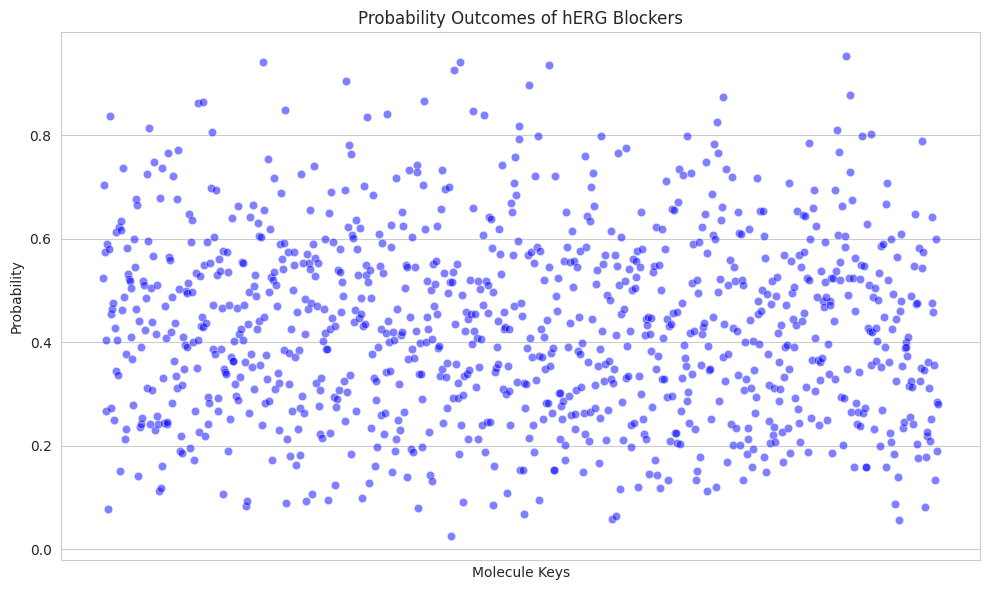

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=output, x='key', y='outcome', color='blue', alpha=0.5)
plt.title('Probability Outcomes of hERG Blockers')
plt.xlabel('Molecule Keys')
plt.ylabel('Probability')
plt.xticks([])  # Remove x-axis ticks and labels
plt.tight_layout()
plt.show()


###Generating an **interactive scatter plot** where users can hover over data points to see detailed information about each molecule's outcome probability. It contains top 10 molecules after 'outcome' column in sorted in descending order , ie, **highest output probability**

In [ ]:
import plotly.graph_objects as go

# Sort the output dataframe by probability in descending order and select the top 10
top_10_highest = output.sort_values(by='outcome', ascending=False).head(10)

# Create text for hover information
hover_text = ['<br>'.join([f"<b>{col}:</b> {row[col]}" for col in top_10_highest.columns]) for index, row in top_10_highest.iterrows()]

# Create the scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=top_10_highest['key'], y=top_10_highest['outcome'], mode='markers',
                                 marker=dict(color='blue', opacity=0.5),
                                 text=hover_text,
                                 hoverinfo='text'))

# Add titles and labels
fig.update_layout(title='Top 10 Molecules with Highest Probability Outcomes of hERG Blockers',
                  xaxis_title='Molecule Keys',
                  yaxis_title='Probability')

# Show the plot
fig.show()



In [ ]:
top_10_highest

,key,input,outcome
889,KHOYJMNYQSPWLL-UHFFFAOYSA-N,COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0.952145
427,JSPXITPXMRLRIW-UHFFFAOYSA-N,Nc1ncnc(Nc2ccc(Oc3ccc(Cl)cc3)cc2)n1,0.940594
191,VIUIHCNTOLSYJT-UHFFFAOYSA-N,O=C1NCC(c2ccccc2)C12CCN(C1CCCCC1c1ccc(F)cc1)CC2,0.940594
534,QVOZSXPZQUDNCZ-UHFFFAOYSA-N,CCCCCCCCN1CCC2(C1)OC(OC)Cc1ccccc12,0.935644
420,INTRMZVYAODVMS-UDWUOZNQSA-N,C[C@H]1CCCN1C1CC[C@H](c2ccc(NS(=O)(=O)c3ccc(F)...,0.925743
291,XIHOJUYAGODVFH-VGSWGCGISA-N,Cc1ncoc1-c1nnc(SCCCN2CC[C@]3(C[C@@H]3c3ccc(F)c...,0.904290
509,NQSVGJXSBNNJME-UHFFFAOYSA-N,CCOc1ccc(S(=O)(=O)Nc2ccc(S(=O)(=O)N3CCCCC3)cc2...,0.896865
894,JMFSDHXFZZFQKE-UHFFFAOYSA-N,N#CC(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)(c1ccccc1)C1...,0.878218
742,URVMQMKGIVIILI-UHFFFAOYSA-N,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccccc1F,0.872937
384,MONIOGAQYVKPEI-UHFFFAOYSA-N,CCCN(CCCc1ccc(F)cc1)Cc1ccc(N)c(I)c1,0.865040


###Generating an **interactive scatter plot** where users can hover over data points to see detailed information about each molecule's outcome probability. It contains top 10 molecules after 'outcome' column in sorted in ascending order , ie, **lowest output probability**

In [ ]:
import plotly.graph_objects as go

# Sort the output dataframe by probability in descending order and select the top 10
top_10_lowest = output.sort_values(by='outcome', ascending=True).head(10)

hover_text = ['<br>'.join([f"<b>{col}:</b> {row[col]}" for col in top_10_lowest.columns]) for index, row in top_10_lowest.iterrows()]


# Create the scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=top_10_lowest['key'], y=top_10_lowest['outcome'], mode='markers',
                                 marker=dict(color='blue', opacity=0.5),
                                 text=hover_text,
                                 hoverinfo='text'))

# Add titles and labels
fig.update_layout(title='Top 10 Molecules with Lowest Probability Outcomes of hERG Blockers',
                  xaxis_title='Molecule Keys',
                  yaxis_title='Probability')

# Hide x-axis ticks and labels for better visualization
# fig.update_xaxes(showticklabels=False)

# Show the plot
fig.show()

In [ ]:
top_10_lowest

,key,input,outcome
416,AIONOLUJZLIMTK-UHFFFAOYSA-N,COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O,0.024752
952,PJHAKRAYWRQDBE-UHFFFAOYSA-N,CC(C)N(CC(=O)NO)C(=O)C1CCCCC1C(=O)O,0.056271
609,IUKYJNCDSUILBM-UHFFFAOYSA-N,O=C(O)CC1OC(=O)c2cc3c(cc21)C(=O)OC3CC(=O)O,0.058168
613,IGHXQNDUQCTKSH-UHFFFAOYSA-N,CCC(C)(C)C(=O)OC,0.064026
504,CFEIFAHHTBGVOG-UHFFFAOYSA-N,N=C(CN)NCCC(=O)O,0.068647
6,WYJOVVXUZNRJQY-UHFFFAOYSA-N,CC(=O)c1cccs1,0.077145
377,PSFBPXQGKNHFBM-UHFFFAOYSA-N,CC(=O)Nc1ccc(C(=O)Nc2nnc(C)s2)cc1,0.079208
983,YVFFCSSMTOXAQS-UHFFFAOYSA-N,CC(C)CC(NC(=O)CCN)C(=O)O,0.082508
171,BFNYDDPQMKYKKJ-YFKPBYRVSA-N,CCOC(=O)[C@H](C)NC(C)=O,0.083333
467,QQHJDPROMQRDLA-UHFFFAOYSA-N,O=C(O)CCCCCCCCCCCCCCC(=O)O,0.085396


IC50: Half-maximal inhibitory concentration , it indicates how much drug is needed to inhibit the biological process by half.

The lower the IC50 value, the more potent the drug

Decoy Threshold:
Meaning: In the context of this study, the decoy threshold refers to the threshold value of IC50 used to classify compounds as decoys (non-blockers) for training the models. Compounds with IC50 values above this threshold are considered as decoys, while those with IC50 values equal to or below this threshold are considered as hERG blockers.

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

# List of SMILES strings of the molecules
smiles_list = top_10_highest['input']
# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Generate Morgan fingerprints for each molecule
fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in mols]

# Calculate pairwise similarity using Tanimoto coefficient
similarity_matrix = [[DataStructs.TanimotoSimilarity(fp1, fp2) for fp2 in fps] for fp1 in fps]

# Print the similarity matrix
for i, smi1 in enumerate(smiles_list):
    for j, smi2 in enumerate(smiles_list):
        print(f"Tanimoto similarity between {smi1} and {smi2}: {similarity_matrix[i][j]}")


Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1 and COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1: 1.0
Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1 and Nc1ncnc(Nc2ccc(Oc3ccc(Cl)cc3)cc2)n1: 0.27102803738317754
Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1 and O=C1NCC(c2ccccc2)C12CCN(C1CCCCC1c1ccc(F)cc1)CC2: 0.14285714285714285
Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1 and CCCCCCCCN1CCC2(C1)OC(OC)Cc1ccccc12: 0.109375
Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1 and C[C@H]1CCCN1C1CC[C@H](c2ccc(NS(=O)(=O)c3ccc(F)cc3)cc2)C1: 0.15151515151515152
Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1 and Cc1ncoc1-c1nnc(SCCCN2CC[C@]3(C[C@@H]3c3ccc(F)cc3F)C2)n1C: 0.11805555555555555
Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1 and CCOc1ccc(S(=O)(=O)Nc2ccc(S(=O)(=O)N3CCCCC3)cc2)cc1: 0.1984126984126984
Tanimoto similarity between COc1ccc(COC(Cn2ccnc2)c2cc

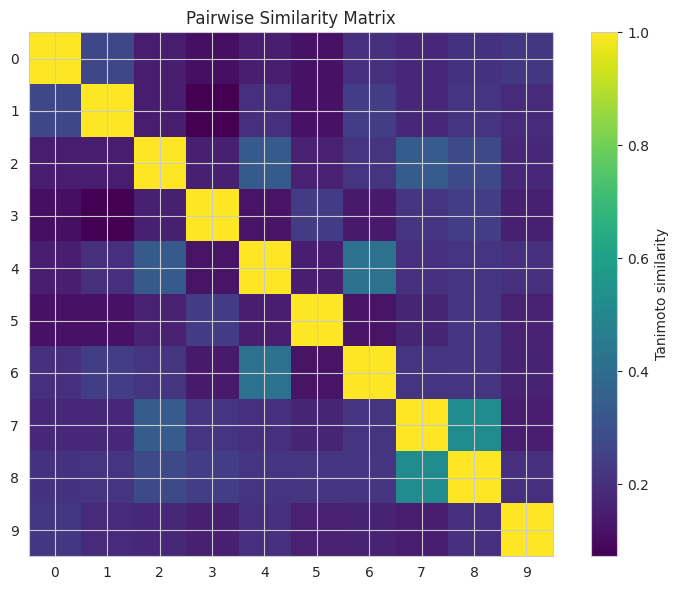

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert similarity matrix to numpy array for plotting
similarity_matrix_np = np.array(similarity_matrix)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix_np, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Tanimoto similarity')
plt.xticks(np.arange(len(smiles_list)), np.arange(len(smiles_list)))
plt.yticks(np.arange(len(smiles_list)), np.arange(len(smiles_list)))
plt.title('Pairwise Similarity Matrix')
plt.tight_layout()
plt.show()


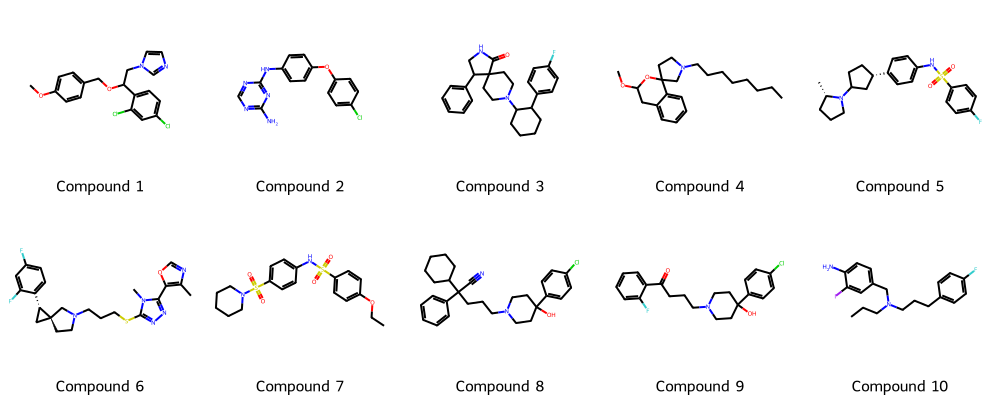

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# List of SMILES strings of the molecules
smiles_list = top_10_highest['input']

# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Draw the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=5,returnPNG=False, subImgSize=(200, 200), legends=[f"Compound {i+1}" for i in range(len(mols))])
# Save the image to a file
img_path = "molecules.png"
img.save(img_path)

# Display the saved image
from IPython.display import Image
Image(img_path)


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

# List of SMILES strings of the molecules
smiles_list = top_10_lowest['input']
# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Generate Morgan fingerprints for each molecule
fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in mols]

# Calculate pairwise similarity using Tanimoto coefficient
similarity_matrix2 = [[DataStructs.TanimotoSimilarity(fp1, fp2) for fp2 in fps] for fp1 in fps]

# Print the similarity matrix
for i, smi1 in enumerate(smiles_list):
    for j, smi2 in enumerate(smiles_list):
        print(f"Tanimoto similarity between {smi1} and {smi2}: {similarity_matrix2[i][j]}")



Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O: 1.0
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and CC(C)N(CC(=O)NO)C(=O)C1CCCCC1C(=O)O: 0.05555555555555555
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and O=C(O)CC1OC(=O)c2cc3c(cc21)C(=O)OC3CC(=O)O: 0.16346153846153846
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and CCC(C)(C)C(=O)OC: 0.05063291139240506
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and N=C(CN)NCCC(=O)O: 0.023529411764705882
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and CC(=O)c1cccs1: 0.09210526315789473
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and CC(=O)Nc1ccc(C(=O)Nc2nnc(C)s2)cc1: 0.11764705882352941
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)cc1O and CC(C)CC(NC(=O)CCN)C(=O)O: 0.031914893617021274
Tanimoto similarity between COc1ccc(C2CC(=O)c3c(O)cc(O)cc3O2)c

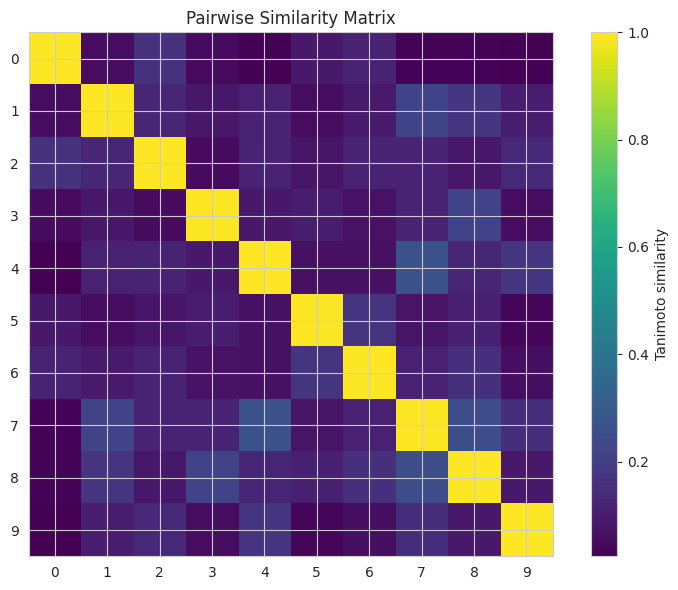

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert similarity matrix to numpy array for plotting
similarity_matrix2_np = np.array(similarity_matrix2)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix2_np, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Tanimoto similarity')
plt.xticks(np.arange(len(smiles_list)), np.arange(len(smiles_list)))
plt.yticks(np.arange(len(smiles_list)), np.arange(len(smiles_list)))
plt.title('Pairwise Similarity Matrix')
plt.tight_layout()
plt.show()


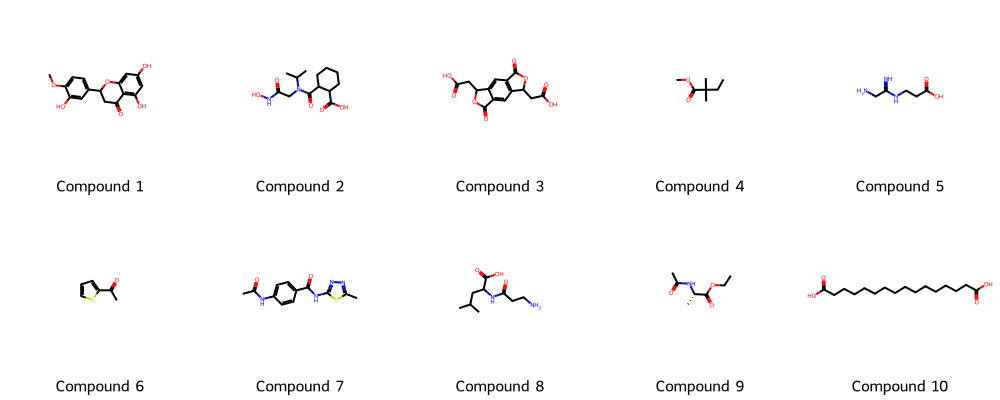

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# List of SMILES strings of the molecules
smiles_list = top_10_lowest['input']

# Convert SMILES strings to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Draw the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=5,returnPNG=False, subImgSize=(200, 200), legends=[f"Compound {i+1}" for i in range(len(mols))])
# Save the image to a file
img_path = "molecules.png"
img.save(img_path)

# Display the saved image
from IPython.display import Image
Image(img_path)

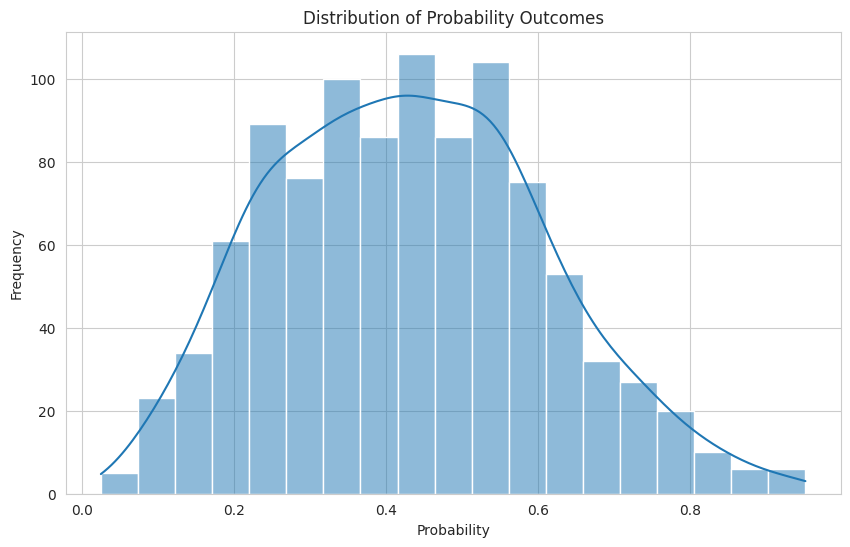

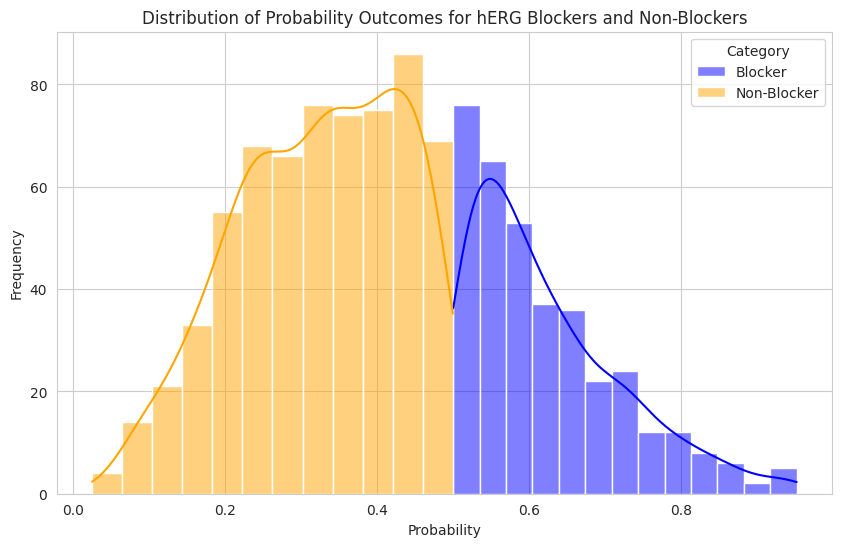

In [ ]:
import seaborn as sns

# Plot the distribution of probabilities
plt.figure(figsize=(10, 6))
sns.histplot(output, x='outcome', kde=True)
plt.title('Distribution of Probability Outcomes')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of probabilities for hERG blockers and non-blockers separately
threshold = 0.5
plt.figure(figsize=(10, 6))
sns.histplot(output[output['outcome'] >= threshold], x='outcome', color='blue', kde=True, label='Blocker')
sns.histplot(output[output['outcome'] < threshold], x='outcome', color='orange', kde=True, label='Non-Blocker')
plt.title('Distribution of Probability Outcomes for hERG Blockers and Non-Blockers')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.show()


The first graph depicts a normal distribution curve illustrating the probabilities of molecules being hERG blockers. It shows that the majority of molecules fall within the range of 0.2 to 0.6, with approximately 0.42 being the mean probability. The graph exhibits a slight right skew, indicating that a significant portion of molecules in the sample space have probabilities below 0.5.

In the second graph, a threshold of 0.5 is set to classify molecules as hERG blockers or non-hERG blockers. Molecules with probabilities above 0.5 are considered hERG blockers, while those with probabilities below 0.5 are categorized as non-hERG blockers.